In [ ]:
import tensorflow as tf

#Without Normalisation 

In [ ]:
tf.__version__

'2.7.0'

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [ ]:
x_train = tf.constant(x_train)
y_train = tf.constant(y_train)

In [ ]:
y_train.dtype

tf.uint8

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(25, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(15, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [ ]:
model.fit(x_train, y_train, epochs=20, validation_data = [x_test, y_test])

Epoch 1/20
1875/1875 [==============================] - 8s 4ms/step - loss: 1.8501 - accuracy: 0.4739 - val_loss: 1.1321 - val_accuracy: 0.5816
Epoch 2/20
1875/1875 [==============================] - 8s 4ms/step - loss: 1.0077 - accuracy: 0.5918 - val_loss: 0.9585 - val_accuracy: 0.6290
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.9059 - accuracy: 0.6218 - val_loss: 0.9148 - val_accuracy: 0.6011
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8720 - accuracy: 0.6289 - val_loss: 0.9159 - val_accuracy: 0.6218
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8535 - accuracy: 0.6339 - val_loss: 0.8599 - val_accuracy: 0.6337
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8306 - accuracy: 0.6385 - val_loss: 0.8310 - val_accuracy: 0.6435
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8204 - accuracy: 0.6417 - val_loss: 0.8293 - val_accuracy:

#With Normalisation

In [ ]:
x_train = x_train/255
x_test = x_test/255

In [ ]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(25, activation="relu"),
    tf.keras.layers.Dense(15, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

In [ ]:
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3*10**(epoch/20))
history1 = model1.fit(x_train, y_train, validation_data=[x_test, y_test], callbacks=[lr_scheduler], epochs=20)

Epoch 1/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5782 - accuracy: 0.7971 - val_loss: 0.4815 - val_accuracy: 0.8261 - lr: 0.0010
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4251 - accuracy: 0.8490 - val_loss: 0.4334 - val_accuracy: 0.8488 - lr: 0.0011
Epoch 3/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3953 - accuracy: 0.8591 - val_loss: 0.4316 - val_accuracy: 0.8520 - lr: 0.0013
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3784 - accuracy: 0.8638 - val_loss: 0.4189 - val_accuracy: 0.8531 - lr: 0.0014
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3655 - accuracy: 0.8686 - val_loss: 0.4136 - val_accuracy: 0.8536 - lr: 0.0016
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3581 - accuracy: 0.8705 - val_loss: 0.4131 - val_accuracy: 0.8519 - lr: 0.0018
Epoch 7/20
1875/1875 [==============================] - 4s

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

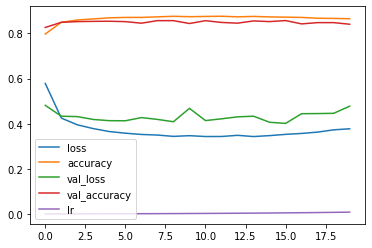

In [ ]:
pd.DataFrame(history1.history).plot()

Text(0.5, 1.0, 'To find the Best Learning Rate')

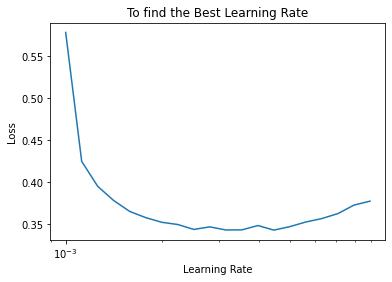

In [ ]:
lrs = 1e-3*10**((np.arange(20)/20))
plt.semilogx(lrs, history1.history["loss"])
plt.ylabel("Loss")
plt.xlabel("Learning Rate")
plt.title("To find the Best Learning Rate")

#Learning Rate = 0.001 and With Normalisation

In [ ]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(25, activation="relu"),
    tf.keras.layers.Dense(15, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

In [ ]:
history2 = model2.fit(x_train, y_train, validation_data=[x_test, y_test], epochs=20)

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5867 - accuracy: 0.7965 - val_loss: 0.4570 - val_accuracy: 0.8362
Epoch 2/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4182 - accuracy: 0.8512 - val_loss: 0.4343 - val_accuracy: 0.8442
Epoch 3/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3853 - accuracy: 0.8614 - val_loss: 0.4266 - val_accuracy: 0.8469
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3645 - accuracy: 0.8696 - val_loss: 0.3997 - val_accuracy: 0.8565
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3487 - accuracy: 0.8739 - val_loss: 0.3900 - val_accuracy: 0.8597
Epoch 6/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3365 - accuracy: 0.8787 - val_loss: 0.3911 - val_accuracy: 0.8607
Epoch 7/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3253 - accuracy: 0.8819 - val_loss: 0.3973 - val_accuracy:

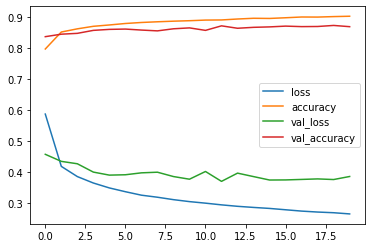

In [ ]:
pd.DataFrame(history2.history).plot()

#Plotting a Confusing Matrix

In [ ]:
y_pred = model2.predict(x_test)
y_pred = tf.argmax(y_pred, 1)
y_pred

<tf.Tensor: shape=(10000,), dtype=int64, numpy=array([9, 2, 1, ..., 8, 1, 5])>

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
#labels=["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

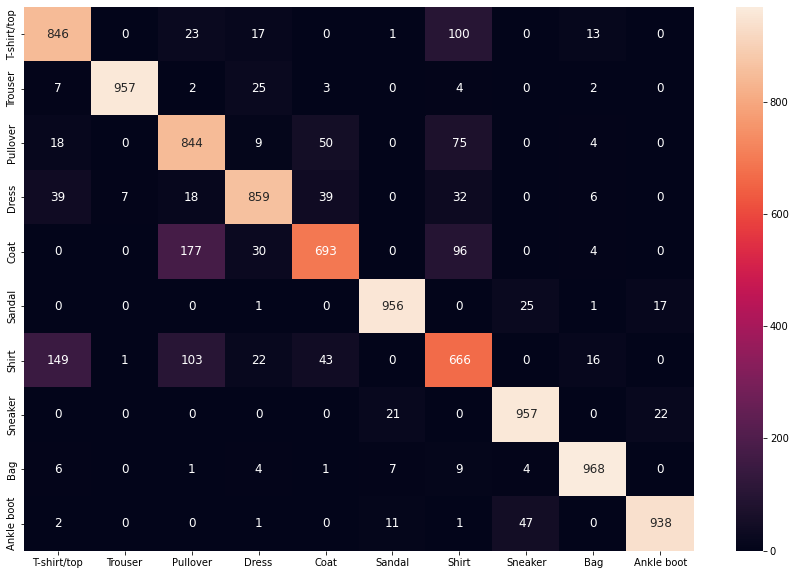

In [ ]:
import seaborn as sns
cm = pd.DataFrame(cm, index=["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"], 
                  columns=["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"])
plt.figure(figsize=(15, 10))
sns.heatmap(cm, annot=True, fmt="d", annot_kws={"size": 12})